<a href="https://colab.research.google.com/github/ArshT/Mini-Projects/blob/master/MNIST_F_CNN_ipnyb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
###Importing the Reqd Libraries

import keras
from keras.models import Sequential
from keras.layers.core import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

Using TensorFlow backend.


In [0]:
###Importing the Dataset

from keras.datasets.fashion_mnist import load_data

(X_train_orig,Y_train_orig),(X_test_orig,Y_test_orig) = load_data()

In [0]:
###Label Dictionary

label_dict = {0:'T-shirt/top',
1:'Trouser',
2:'Pullover',
3:'Dress',
4:'Coat',
5:'Sandal',
6:'Shirt',
7:'Sneaker',
8:'Bag',
9:'Ankle boot'}

In [4]:
###Overview of Imported Data

print("X_train Shape:",X_train_orig.shape)
print("Y_train Shape:",Y_train_orig.shape)
print("X_test Shape:",X_test_orig.shape)
print("Y_test Shape:",Y_test_orig.shape)

X_train Shape: (60000, 28, 28)
Y_train Shape: (60000,)
X_test Shape: (10000, 28, 28)
Y_test Shape: (10000,)


Sandal


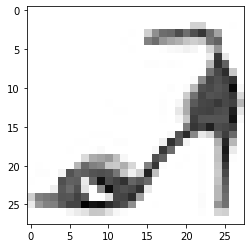

In [5]:
###Visualizing a Training Example

img_index = 2323
img = X_train_orig[img_index]
label = Y_train_orig[img_index]

print(label_dict[label])
plt.imshow(img,cmap='Greys')

In [0]:
###Pre-Processing the Data

##Normalizing the Data
X_train = X_train_orig/255
X_test = X_test_orig/255

In [7]:
##Reshaping the X arrays

X_train = X_train.reshape(X_train.shape[0],28,28,1)
X_test = X_test.reshape(X_test.shape[0],28,28,1)

print("X_train shape:",X_train.shape)
print("X_test Shape:",X_test.shape)

X_train shape: (60000, 28, 28, 1)
X_test Shape: (10000, 28, 28, 1)


In [0]:
##One Hot encoding

Y_train = keras.utils.to_categorical(Y_train_orig,10)
Y_test = keras.utils.to_categorical(Y_test_orig,10)

In [9]:
###Overview Of Processed Data

print("X_train Shape:",X_train.shape)
print("Y_train Shape:",Y_train.shape)
print("X_test Shape:",X_test.shape)
print("Y_test Shape:",Y_test.shape)

X_train Shape: (60000, 28, 28, 1)
Y_train Shape: (60000, 10)
X_test Shape: (10000, 28, 28, 1)
Y_test Shape: (10000, 10)


In [10]:
###Creating a Model
input_shape = (28,28,1)

model = Sequential()

#1 and 2
model.add(Conv2D(32,(3,3),padding='SAME',activation='relu',input_shape = input_shape))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='SAME'))

#3 and 4
model.add(Conv2D(64,(3,3),padding='SAME',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='SAME'))

#5 and 6
model.add(Conv2D(128,(3,3),padding='SAME',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='SAME'))

#7 and 8
model.add(Conv2D(256,(3,3),padding='SAME',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='SAME'))

#9(Flat)
model.add(Flatten())

#10 and 11
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.3))

#12 and 13
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.3))

#14
model.add(Dense(10,activation='softmax'))






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [11]:
###Compiling the Model

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['categorical_accuracy'])

In [12]:
###Training the Model

history = model.fit(X_train,Y_train,batch_size=64,epochs=10,verbose=1,validation_data=(X_test,Y_test))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/10





60000/60000 [==============================] - 11s 184us/step - loss: 0.5628 - categorical_accuracy: 0.7929 - val_loss: 0.3659 - val_categorical_accuracy: 0.8685
Epoch 2/10
60000/60000 [==============================] - 9s 144us/step - loss: 0.3142 - categorical_accuracy: 0.8868 - val_loss: 0.3089 - val_categorical_accuracy: 0.8887
Epoch 3/10
60000/60000 [==============================] - 8s 141us/step - loss: 0.2630 - categorical_accuracy: 0.9061 - val_loss: 0.2684 - val_categorical_accuracy: 0.9035
Epoch 4/10
60000/60000 [==============================] - 8s 137us/step - loss: 0.2287 - categorical_accuracy: 0.9177 - val_loss: 0.2482 - val_categorical_accuracy: 0.9092
Epoch 5/10
60000/60000 [==============================] - 8s 139us/step - loss: 0.2032 - categorical_accuracy: 0.9262 - val_loss: 0.2591 - val_categorical_accu

Bag


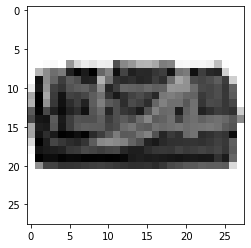

In [13]:
###Making a Prediction

img_index_predict = 2321
img_predict = X_test_orig[img_index_predict]
plt.imshow(img_predict,cmap='Greys')
print(label_dict[Y_test_orig[img_index_predict]])

In [14]:
X_pred = X_test[img_index_predict].reshape(1,28,28,1)
Prediction = model.predict_classes(X_pred)
Pred_key = Prediction[0]
print(label_dict[Pred_key])

Bag
